In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
narrow_data = np.load('data/DAW_DATA_100_sims.npy').item()
broad_data = np.load('data/DAW_DATA_100_sims_BROAD_REWARDS.npy').item()


In [23]:
def var_main(read_data):


    n_simulations = 100



    w_to_probs= {}
    w_to_vars= {}

    for w in read_data:

        prob_r1_rew_vect = np.zeros(n_simulations)
        var_r1_rew_vect = np.zeros(n_simulations)
        prob_r1_no_rew_vect = np.zeros(n_simulations)
        var_r1_no_rew_vect = np.zeros(n_simulations)


        R1 = read_data[w]['R1']
        S2 = read_data[w]['S2']
        RW = read_data[w]['Rw']

        for sim in range(n_simulations):
            R1_offset = R1[sim,1:]
            S2_offset = S2[sim, :-1]
            RW_offset = RW[sim, :-1]

            R1_masked = R1_offset[(S2_offset==2) & (RW_offset==1)]
            prob_r1_rew_vect[sim] = np.sum(R1_masked==2)/len(R1_masked)

            var_r1_rew_vect[sim] = prob_r1_rew_vect[sim]*len(R1_masked)*(1.0-prob_r1_rew_vect[sim])

            R1_masked = R1_offset[(S2_offset==2) & (RW_offset==0)]
            prob_r1_no_rew_vect[sim] = np.sum(R1_masked==2)/len(R1_masked)

            var_r1_no_rew_vect[sim] = prob_r1_no_rew_vect[sim]*len(R1_masked)*(1.0-prob_r1_no_rew_vect[sim])

        w_to_probs[w] = (prob_r1_rew_vect, prob_r1_no_rew_vect)
        w_to_vars[w] = (var_r1_rew_vect, var_r1_no_rew_vect)
    
    return (w_to_probs, w_to_vars) 



def plot_probs(w_to_probs, broad=False):
#     plt.figure()
    sorted_keys = sorted(w_to_probs.keys())
    plt.errorbar(sorted_keys, [np.mean(w_to_probs[key][0]) for key in sorted_keys],
                 yerr=[np.std(w_to_probs[key][0]) for key in sorted_keys], label='Pr(R1=2|S2=2 & RW=1)')
    plt.errorbar(sorted_keys, [np.mean(w_to_probs[key][1]) for key in sorted_keys],
             yerr=[np.std(w_to_probs[key][1]) for key in sorted_keys], label='Pr(R1=2|S2=2 & RW=0)')
    plt.ylim((.2, .8))
    plt.ylabel('Pr[R1]')
    if broad:
        s = 'Pr R1|S2=2 for BROAD reward'
    else:
        s= 'Pr R1|s2=2 for NARROW reward'
        
    plt.title(s)
    plt.xlabel('MBMF w value')
    plt.legend()
#     plt.show()
    
def plot_vars(w_to_vars, broad=False):
#     plt.figure()
    sorted_keys = sorted(w_to_probs.keys())
    plt.errorbar(sorted_keys, [np.mean(w_to_vars[key][0]) for key in sorted_keys],
                 yerr=[np.std(w_to_vars[key][0]) for key in sorted_keys], label='Var(R1=2|S2=2 & RW=1)')
    plt.errorbar(sorted_keys, [np.mean(w_to_vars[key][1]) for key in sorted_keys],
             yerr=[np.std(w_to_vars[key][1]) for key in sorted_keys], label='Var(R1=2|S2=2 & RW=0)')
    if broad:
        s = 'Var  R1|S2=2 for BROAD reward'
    else:
        s= 'Var R1|S2=2 for NARROW reward'
    plt.ylabel('Var[R1]') 
    plt.title(s)
    plt.xlabel('w value')
    plt.legend()
#     plt.show()
    

In [15]:
narrow_prob,narrow_var = var_main(narrow_data)
broad_prob,broad_var = var_main(broad_data)

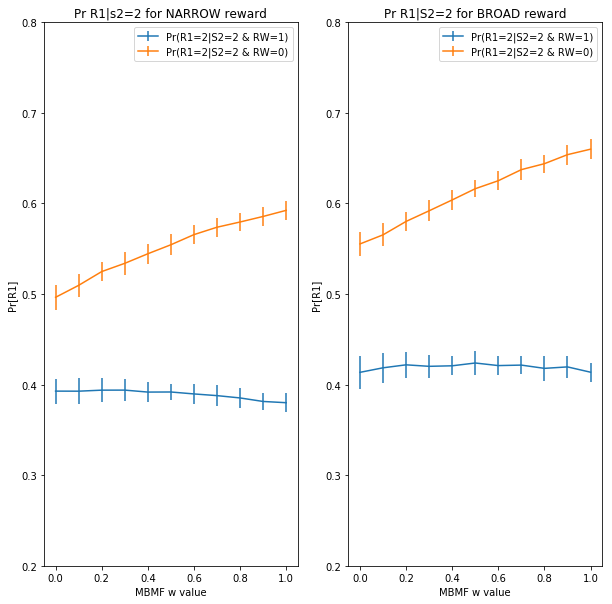

In [22]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plot_probs(narrow_prob, False)
plt.subplot(1,2,2)
plot_probs(broad_prob, True)

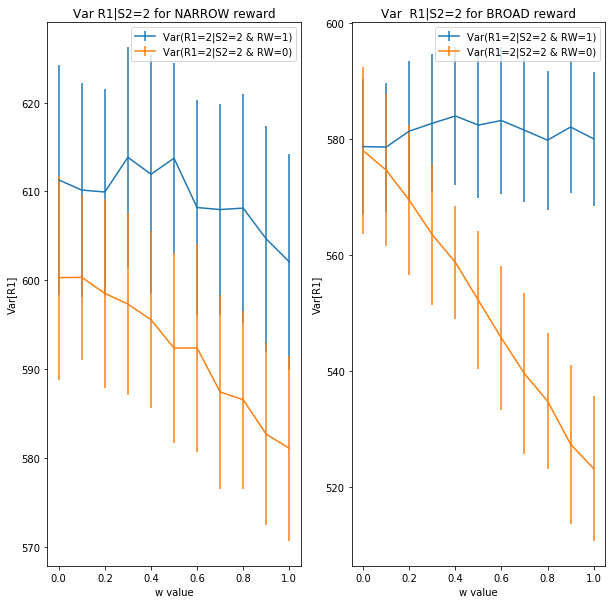

In [24]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plot_vars(narrow_var, False)
plt.subplot(1,2,2)
plot_vars(broad_var, True)